# Python Function CheatSheet

## Modules

In [1]:
#Common

%pylab inline

import numpy as np #scientific computing & companion tool to pandas 
from pandas import Series, DataFrame
import pandas as pd
import math
import statsmodels.api as sm
from patsy import dmatrices #For describing statistical models (especially linear) & building design matrices. Similar to R formulas
import seaborn as sns #Makes plots look purty 
import sklearn #General statistics library with tons of models & different options - usually better to import specific functions (see below)
from sklearn.cross_validation import train_test_split #Module for cross-validation
import re #regular expressions


#Situational

import networkx #Network analysis (and weighted page ranks)
import os #Miscellaneous operating system interfaces
import pandas_datareader.data as web #Load Data from WEB (i.e. stocks from Yahoo)
from mpl_toolkits.mplot3d import Axes3D #3D Graphical Modeling
import warnings #Module to turn off warnings
warnings.filterwarnings('ignore')

## Basic Functions

In [ ]:
#Read a file while splitting the lines
santa = open('Santa.txt').read().splitlines()

#Split a text object by some delimiter (default is space)
words = tweet.split()

#Join text objects in list together with specified delimiter
tweet = " ".join(words)

#Numpy - return array of bins between defined start & stop point
np.linspace(0, 4e7, num= 100)
# num = Number of samples to generate. Default is 50. Must be non-negative.

## Panda Functions

### Series

In [ ]:
#Create Series from list
unit_price_series = Series(unit_prices, index=part_names)

#Create Series from dictionary
obj2 = Series({'Wheels':500, 'Doors':200, 'Windows':100, 'Engine':2000, 'Body':5000})

#Access item(s) in Series
unit_price_series[['Body', 'Doors', 'Windows']]

#Check if item in Series index
'Body' in unit_price_series

#List-slicing on Series
unit_price_series[3:]
unit_price_series['Wheels':'Windows']

#Apply more complex functions to series using map()
unit_price_series.map(math.sqrt)

#Built in aggregation formulas
unit_price_series.mean()
unit_price_series.var()
unit_price_series.max()
unit_price_series.min()

#Find null or not null values
missing_series.isnull()
missing_series.notnull()

#Drop null values
missing_series.dropna()

#Fill null values
missing_series.fillna(-1)

#Return frequency of each unique record (and top 10 / bottom 10)
vc = orig_data['Complaint Type'].value_counts()
vc[:10]
vc[-10:]

#Plot value counts
vc.plot(kind='bar')

#Rename index with values from another series (indexes must match)
vc_renamed = vc.rename(borough_zip_series)

### Dataframes

In [ ]:
#Define index on df load or after
df = DataFrame(data, index=part_names)
df.set_index('Part name', inplace=True)

#Count records in df
len(df)

#Return index as a list
df.index.values

#Return row for specified record (specification based on df INDEX)
car_table.ix['Windows']

#Return multiple rows
car_table.ix[['Engine', 'Body']]

#Return column values
car_table.columns.values

#Flip rows & columns
car_table.T

#Load data from CSV OR TXT
df = pd.read_csv('Intro_4_Data/CarParts.csv',
                 sep='::', # field separator (default is ",")
                 header=None,   # do not use the first line as a header (default to use first line)
                 names=['user_id', 'gender', 'age', 'occupation', 'zip'],#Define column headers (header must be set to None)
                 nrows=100000,
                 dtype=unicode,
                 engine = 'python' #use for reading .dat files
                 parse_dates=['Created Date']) #Set column as date column. To set index as date, use parse_dates = True

#Apply a function across each column in a df
def get_column_range(x):
    return x.max() - x.min()

df.apply(get_column_range)

#Sort df by index
df.sort_index()

#Sort df by a column
df.sort_values('Price per unit', ascending = False)

#Rank df column
reputation_rank = askers['Reputation'].rank(ascending=False)
print reputation_rank[:5]

#Cut dataset into percentile ranges (can be used to disrectize continus variables into bins)
reputation_percentile = pd.qcut(df['Reputation'], 10)
reputation_percentile[:5]

#Find Quantiles within numbered series
state_pop.quantile(0.25) #25th percentile

#Remove duplicates, but only for a specific column (i.e. subset)
borough_zip_dedup = borough_zip_clean.drop_duplicates(subset='Incident Zip')

#Return unique values of a column
orig_data['Complaint Type'].unique()

#Count unique values of a column
orig_data['Complaint Type'].nunique()

#Copy a dataframe
noise_complaints.copy()

#Map list of outcomes in column/series to another list (for instance, to correct mispellings):
cars['manufacturer'].replace(['Chevy', 'Chevroelt', 'Toyouta', 'Maxda', 'Vokswagen'],
                             ['Chevrolet', 'Chevrolet', 'Toyota', 'Mazda', 'Volkswagen'])

#### Joins

In [ ]:
#Merge two dataframes
questions_askers = pd.merge(questions, askers,
                            left_on='OwnerUserId',
                            right_on='Id',
                            suffixes=['_question', '_asker'])

#Join Series (join is on Series Index and index of specified column in DF)
gold = gold.set_index('url')
labels['gold_class'] = labels['url'].map(gold['class'])

#### Aggregations

In [ ]:
#Group By
mean_group_speed = cars.groupby(['cyl', 'manufacturer'])[['speed']].mean()

#Group by user-defined function(s)
def speed_range(s):
    """Given a series of speeds (called s), get the range"""
    return s.max() - s.min()
cars.groupby(['cyl', 'manufacturer'])[['speed']].agg(['mean', 'count', speed_range])[:10]

# Access hierarchical indexs created by Group By using _tuple_
mean_group_speed.ix[(3, 'Mazda')]

#Create Pivot Table
pivoted = pd.pivot_table(complaints,
                         index='Complaint Type',
                         columns=['Borough', 'Status'],
                         values='count',
                         aggfunc=sum,
                         fill_value=0)  # fill in missing values

#Create a pivot table of dimensions, most common outcome & its frequency - see Pandas 3 Merging & Reshaping
most_common = DataFrame({'Most common complaint':pivoted.idxmax(), 'Num complaints':pivoted.max()})

#Return the index corresponding to the maximum value for each colum
complaint_agency.idxmax()

#Rotate rows to columns or vice-versa
url_believ = url_believ.unstack('class')
url_believ = url_believ.stack('class')

#Cross-tab - essentially a Group by w/ count as aggregation
rating_vs_target = pd.crosstab(df['rate_marriage'], df['target'])

#Normalize cross-tab for comparison
total_ratings = rating_vs_target.apply(sum)
rating_vs_target /= total_ratings

#### Time-Series

For calendar dates, use _date_range()_, with a common case being:  
date_range(start_date, end_date, freq)  
The "freq" can be:  
'D' for daily  
'B' for each business day  
'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...  
'M' for monthly  
...  
'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [ ]:
#Import function
df = pd.read_csv('Pandas_6_data/aapl.csv', parse_dates=True).set_index('Date')

#Pull various datetime attributes about index
sixth_date = df.index[5]
sixth_date.year
sixth_date.month
sixth_date.day
sixth_date.dayofweek  # Monday=0, ..., Sunday=6
sixth_date.quarter

#Slicing in time series
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2013-05']
closings['2012']
dates = pd.date_range(start='1/3/2013', end='2/3/2013', freq='W-TUE')

#Shift by 1 Day
yesterdays_closes = closes.shift(1)

# % Change DoD
df['percent change'] = (closes / yesterdays_closes - 1) * 100

#Aggregations by date-rane:
df['Volume'].resample('M', kind='period').sum()[:10]
df['Close'].resample('W', kind='period').mean()[:10]

#Moving Averages
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
# window = Days trailing to include in average
# min_periods = # of days before moving average begins to calculate

## Visualizations

##### Marker Options
marker= 'o' for circle  
marker= 's' for square marks  
marker= 'p' for pentagons  
marker= '.' for points  
marker= '^' for upward-pointing triangle  

##### Line-Style Options  
linestyle= 'None' no line (i.e. scatterplot)  
linestyle= '-' for plain line  
linestyle= '--' for dashed line  
linestyle= '-.' for dotted-dashed line  

#### Bar Chart

In [ ]:
names['name'].value_counts()[:10].plot(kind='bar')

#Panda will automatically stack bar charts for pivot tables
df.plot(kind='bar', figsize=(8, 8))

#Save figure in active directory
savefig('slide_figs/husband_wife_scatter.png')

#### Scatterplot

For colormap plots:  
use the colormap called 'bwr', which goes from blue (b) to white (w) to red (r), dependending on the value of y  
the minimum value of y (i.e., 0) gets the color blue  
the maximum value of y (i.e., 1) gets red  
intermediate values, if they had existed, would have been colored white  

In [ ]:
plot(cars['wt'], cars['mpg'], marker='o', color='blue', linestyle='None')
xlabel('Weight')
ylabel('Miles per Gallon')
title('Weight versus Efficiency')
show()

#Example - Scatterplot Seperated by row dimension
plot(cars[cars['cyl'] == 4]['wt'], cars[cars['cyl'] == 4]['mpg'], marker='o', linestyle='None', label='4 cylinder')
plot(cars[cars['cyl'] == 6]['wt'], cars[cars['cyl'] == 6]['mpg'], marker='o', linestyle='None', label='6 cylinder')
plot(cars[cars['cyl'] == 8]['wt'], cars[cars['cyl'] == 8]['mpg'], marker='o', linestyle='None', label='8 cylinder')
xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

#Plot multiple plots together
# First, create a blank figure and "axis" objects
fig, (ax1, ax2, ax3) = subplots(nrows=3,
                                ncols=1,
                                sharex=True,
                                sharey=True,
                                figsize=(8, 12))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(c4['wt'], c4['mpg'], marker='o', color='blue', linestyle='None')
ax1.set_title('4 cylinder')
ax1.set_ylabel('MPG')

ax2.plot(c6['wt'], c6['mpg'], marker='o', color='green', linestyle='None')
ax2.set_title('6 cylinder')
ax2.set_ylabel('MPG')

ax3.plot(c8['wt'], c8['mpg'], marker='o', color='red', linestyle='None')
ax3.set_title('8 cylinder')
ax3.set_ylabel('MPG')
ax3.set_xlabel('Weight')

show()

#Scatterplot w/ color scale (for logistic regression in this case)
y = Y['target'].values

sc = scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, cmap='bwr')
colorbar(sc)
xlabel('Sepal length')
ylabel('Sepal width')

#### Line Chart

In [ ]:
#Line-plot w/ multiple lines (each one a column)

plot(births['year'], births['M'], marker='None', linestyle='-', label='boys')
plot(births['year'], births['F'], marker='None', linestyle='-', label='girls')
xlabel('Year')
ylabel('Number of births')
legend(loc='best')
show()

#Short-cut when plotting a series (below are equal)
Series.plot()
plot(Series.index.values, Series.values)

#Panda built-in function for plotting multiple charts by separated dimension
year_name_pivot[['Sammy', 'Arturo', 'Emery', 'Walker']].plot(subplots=True, figsize=(8, 12))

#### Histogram

In [ ]:
cars['mpg'].hist()
xlabel('Miles per gallon')
ylabel('Frequency')

#Plot normalized histogram
df.hist(normed=1)

#### Box-Plot

In [ ]:
husband_wife.boxplot(column='Wife', by='husband_groups', figsize=(12,8), fontsize=28)

#### Misc. Charts

Populating the interactive namespace from numpy and matplotlib


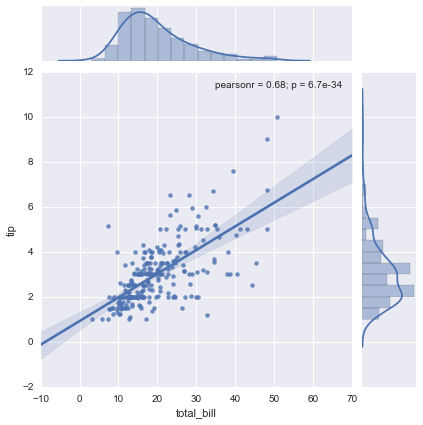

In [4]:
#Awesome chart for joint distribution of two variables
import seaborn as sns
%pylab inline
tips = sns.load_dataset("tips")
sns.jointplot("total_bill", "tip", tips, kind='reg')

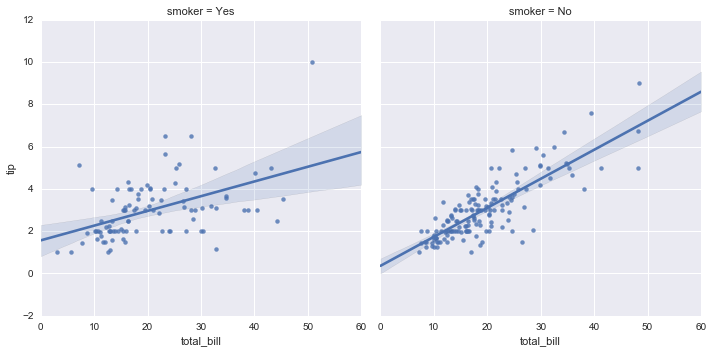

In [6]:
#Plot a scattor plot segregated by a selected Panda column
sns.lmplot("total_bill", "tip", tips, col="smoker");

## Basic Statistics

In [ ]:
#Provide summary statistics for a series, dataframe or groupby
state_pop.describe()
census_pop_statistics = census_pop.groupby('REGION NAME').describe()

#Calculate Standard Deviation
state_census['POPESTIMATE2014'].std()

#Plot histogram with line for median & mean
mean = state_pop.mean()
median = state_pop.median()

state_pop.hist(bins=10)                                                     # Histogram
plot([mean, mean], [0, 30], color='red', linewidth=5, label='Mean')         # Mean
plot([median, median], [0, 30], color='green', linewidth=5, label='Median') # Median
legend(loc='best')

#Calculate correlation between two series
heights['parent'].corr(heights['child'])

#Simple Linear Regression (built-in to Pandas vanilla - see below for more fleixble option)

#Define linear regression model
result = pd.ols(x=cars['wt'], y=cars['mpg'])
#Basic report of linear model:
result

#Return specific values of interest
result.beta['intercept'] # intercept
result.beta['x'] # slope
result.params #all parameters of model
result.r2 # R-squared
result.p_value #P Value

## Statistical Modeling Process (w/ sklearn)

In [ ]:
#STEP 1 - Create Design Matrix - this will automatically create dummy variables
y, X = dmatrices('Lottery ~ Literacy + Wealth', data=guerry, return_type='dataframe') #must import patsy
# * If classification problem, then need to complete extra step of converting y values to list
y = y['Lottery'].values

#EXTRA - To deal with column headers with unaccepted characters (i.e. "("):
formula = 'is_spam ~ ' + ' + '.join(['Q("'+x+'")' for x in df.columns.values[:-1]])
Y, X = dmatrices(formula, df, return_type='dataframe')
print formula

#EXTRA - Scale the data
from sklearn.preprocessing import scale
scaled_images = scale(digits.data)

#STEP 2 - Split into train & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #must import sklearn

#EXTRA 1 - K-Fold Cross Validation - see Classification 1 Nearest Neighbors for details on how to use
from sklearn import cross_validation
kfold = cross_validation.StratifiedKFold(y, n_folds=3)

#Look at first five results
X_train.iloc[0:5]

#STEP 3 - Define Model
model = sm.OLS(y, X)

#STEP 4 - Fit training data to model
result = model.fit(X_train, y_train)

#STEP 5 - Review Summary Statistics of Model:

print result.summary()

#Return values of interest of model
result.params #model parameters
result.pvalues #p-values
result.rsquared # R-squared

#STEP 6 - Use fitted model to predict Y values for training & test data
from sklearn import metrics
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

#To get scores rather then classifications:
model.predict_proba(X_train.iloc[0:5])

#STEP 7 - Evaluate accuracy of fit for training & test data
print metrics.accuracy_score(y_train, prediction_train)
print metrics.accuracy_score(y_test, prediction_test)

#EXTRA 2 - Fit Confusion Matrix

cm = confusion_matrix(prediction_test, y_test)

#visualize cm

matshow(cm)
xticks([0, 1, 2, 3], news_train.target_names, rotation='vertical')
yticks([0, 1, 2, 3], news_train.target_names)
colorbar()
ylabel('True Labels')
xlabel('Predicted Labels')

#Create precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pred_probs[:, idx], pos_label=idx)

## Predictive Models

In [ ]:
#Linear Regression (or multiple regression)
model = sm.OLS(y, X)

#Logistic Regression - everything but the function to generate model is the same
model = sm.Logit(y, X)

    #Extra - Create series for model coefficients
    weights = Series(model.coef_[0],
                     index=X.columns.values)
    weights.sort_values()

#KNN
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform', #can set to "distance" if you want closer neighbors to contribute more
                                       p=2) #p=2 is Euclidean distance

    #Function to chose best K for KNN
    clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv =10)

#Naive Bayes
#Requires all dummy variables, which patsy doesn't do. Need to use a pandas-specific way of dummy encoding (See Classification 2)
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()

print 'Prior probability for the negative class is',
print exp(model.class_log_prior_[0])
print 'Prior probability for the positive class is',
print exp(model.class_log_prior_[1])

#Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy'
                                   , max_depth=2) #set depth of tree (optional)

    #Print Decision Tree
    from StringIO import StringIO
    import pydot_ng
    dot_data = StringIO()
    tree.export_graphviz(model2, out_file=dot_data, feature_names=X.columns.values)
    pydot_ng.graph_from_dot_data(dot_data.getvalue()).write_png('Classification_4_data/titanic2.png')
    
    #Run K-Folds & iterate over max depth
    from sklearn.cross_validation import cross_val_score
    from sklearn import cross_validation

    # Create the folds in the training data
    cv = cross_validation.StratifiedKFold(y_train, n_folds=3, shuffle=True)

    # Iterate over max_depth
    for max_depth in [1, 2, 3, 4, 5]:
        model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
        scores = cross_val_score(model3, X_train, y_train, cv=cv)
        print 'max_depth =', max_depth, 'score =', scores, 'avg score =', scores.mean()
        
#Bagging
bagging = BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)

# bagging.estimators_ contains the list of all the decision trees

#Random Forests
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, random_state=1)

#Boosting (Gradient Boosted Decision Tree)
from sklearn.ensemble import GradientBoostingClassifier
boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=1)


## Clustering Models

In [ ]:
#K-Means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', random_state=1) #k-means++ uses a better algo for initialization

#Model fit is same formula, but now for only X:
model.fit(X)

#Get basic info about clusters
model.cluster_centers_ #Cluster Centers
model.labels_ #Cluster labels for every point

#Plot cluster centers
scatter(X[:,0], X[:,1], c=model.labels_, cmap='gist_ncar')
scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

#Plot sum of distance for number of clusters in range
sum_of_distances = {}
for num_clusters in range(1,16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(X)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Sum of distances of points to closest cluster centers')

## Text Analytics

In [ ]:
#TF-IDF

# Calculate TF
from sklearn.feature_extraction.text import CountVectorizer

vect_tf = CountVectorizer(stop_words='english')
X_train['TF'] = vect_tf.fit_transform(news_train.data)

# Calculate TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tfidf = TfidfVectorizer(stop_words='english')
X_train['TFIDF'] = vect_tfidf.fit_transform(news_train.data)

## Boot-Strapping

How to create one bootstrapped sample:  
1. Draw one random observation from the given sample  
2. Repeat samplesize times  
3. Output: a bootstrapped sample with samplesize observations

To get the CI:

* Draw multiple bootstrapped samples
    * For each, compute the bootstrapped sample mean
* Use the distribution of the bootstrapped sample means to compute the CI

In [ ]:
#Function to create boot-strap sample means for dataset.
#**NEED TO FIND & ADD STANDARD FUNCTIONS FOR THIS

def bootstrapped_means(samples, num_bootstraps=100000, verbose=True):
    samplesize = len(samples)

    # Get a bunch of indices for the boostrapped samples
    idx = np.random.randint(0, samplesize, (num_bootstraps, samplesize))
    bootstrapped_samples = samples[idx]
    bootstrapped_sample_means = np.mean(bootstrapped_samples, axis=1)
    
    if verbose:
        # Plot the histogram
        s = Series(bootstrapped_sample_means)
        s.hist(bins=20)
    
        print 'Bootstrapped means with samplesize={}'.format(samplesize)
        print '\t avg={} std={}'.format(s.mean(), s.std())
    
    # Compute the Confidence interval
    sorted_means = sorted(bootstrapped_sample_means)
    CI_low = sorted_means[int(0.025 * len(sorted_means))]
    CI_high = sorted_means[int(0.975 * len(sorted_means))]
    if verbose:
        print '\t 95% Confidence interval = [{}, {}]'.format(CI_low, CI_high)
    return CI_low, CI_high